In [2]:
# importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [79]:
# Toolkits for Natural Language Processing work
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
from emoji import UNICODE_EMOJI
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
from textblob import TextBlob
import random 
import pickle
import re

In [5]:
tweets_df = pd.read_csv('clean_processed_tweet_data.csv')

In [6]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,-1.250000e-01,en,4,2,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN
1,1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,0.100000,-1.000000e-01,en,691,201,ZIisq,65,272,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000,0.000000e+00,en,0,0,Fin21Free,85,392,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",0.350000,1.000000e-01,en,0,0,Fin21Free,85,392,NaN,XiJinping,NaN,Netherlands
4,4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: Iâm sorry, I thought Ta...",0.556250,-6.940000e-18,en,1521,381,VizziniDolores,910,2608,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


In [7]:
#for data understanding
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7439 entries, 0 to 7438
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7439 non-null   int64  
 1   created_at          7439 non-null   object 
 2   source              7439 non-null   object 
 3   original_text       7439 non-null   object 
 4   subjectivity        7439 non-null   float64
 5   polarity            7439 non-null   float64
 6   lang                7439 non-null   object 
 7   favorite_count      7439 non-null   int64  
 8   retweet_count       7439 non-null   int64  
 9   original_author     7439 non-null   object 
 10  followers_count     7439 non-null   int64  
 11  friends_count       7439 non-null   int64  
 12  possibly_sensitive  3976 non-null   object 
 13  hashtags            6912 non-null   object 
 14  user_mentions       4149 non-null   object 
 15  place               4635 non-null   object 
dtypes: flo

In [9]:
#get the shape of data(in row and column)
tweets_df.shape


(7439, 16)

In [10]:
#checking the number of missing values
print("The number of missing value(s): {}".format(tweets_df.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets_df.columns[tweets_df.isnull().any()]))

The number of missing value(s): 10084
Columons having columns value:Index(['possibly_sensitive', 'hashtags', 'user_mentions', 'place'], dtype='object')


In [11]:
#check "Nan" values
tweets_df.isna().any()

Unnamed: 0            False
created_at            False
source                False
original_text         False
subjectivity          False
polarity              False
lang                  False
favorite_count        False
retweet_count         False
original_author       False
followers_count       False
friends_count         False
possibly_sensitive     True
hashtags               True
user_mentions          True
place                  True
dtype: bool

In [23]:
#replace NaN values with columns
tweets_df['possibly_sensitive']=tweets_df['possibly_sensitive'].fillna('Neutral')
tweets_df['hashtags']=tweets_df['hashtags'].fillna('No hashtags')
tweets_df['user_mentions']=tweets_df['user_mentions'].fillna('No user mention')
tweets_df['place']=tweets_df['place'].fillna('No place')

In [24]:
#check Nan values again
tweets_df.isna().any()

Unnamed: 0            False
created_at            False
source                False
original_text         False
subjectivity          False
polarity              False
lang                  False
favorite_count        False
retweet_count         False
original_author       False
followers_count       False
friends_count         False
possibly_sensitive    False
hashtags              False
user_mentions         False
place                 False
dtype: bool

In [49]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,-1.250000e-01,en,4,2,i_ameztoy,20497,2621,No Neutral,City,i_ameztoy,No place
1,1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,0.100000,-1.000000e-01,en,691,201,ZIisq,65,272,No Neutral,"China, Taiwan",IndoPac_Info,No place
2,2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000,0.000000e+00,en,0,0,Fin21Free,85,392,No Neutral,XiJinping,ZelenskyyUa,Netherlands
3,3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",0.350000,1.000000e-01,en,0,0,Fin21Free,85,392,No Neutral,XiJinping,No user mention,Netherlands
4,4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: Iâm sorry, I thought Ta...",0.556250,-6.940000e-18,en,1521,381,VizziniDolores,910,2608,No Neutral,No hashtags,ChinaUncensored,"Ayent, Schweiz"


In [52]:
tweets_df.describe()

,Unnamed: 0,subjectivity,polarity,favorite_count,retweet_count,followers_count,friends_count
count,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7.439000e+03,7439.000000
mean,10683.619438,0.295564,0.056723,203.378546,38.718376,4.108310e+04,1715.728458
std,6490.673644,0.287755,0.230114,1655.799765,326.778681,4.910436e+05,5306.234026
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4864.000000,0.000000,0.000000,0.000000,0.000000,7.250000e+01,106.000000
50%,10605.000000,0.250000,0.000000,0.000000,0.000000,3.670000e+02,440.000000
75%,16227.500000,0.500000,0.136364,4.000000,2.000000,1.833000e+03,1505.000000
max,21997.000000,1.000000,1.000000,65170.000000,17409.000000,1.449852e+07,208360.000000


In [59]:
def getAdjectives(tweet):
    
   return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [60]:
tweets_df['Tweets_Adjectives'] = tweets_df['original_text'].apply(getAdjectives)

In [61]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,Tweets_Adjectives
0,0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,-1.250000e-01,en,4,2,i_ameztoy,20497,2621,No Neutral,City,i_ameztoy,No place,RT ameztoy Extra random image I Lets focus in ...
1,1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,0.100000,-1.000000e-01,en,691,201,ZIisq,65,272,No Neutral,"China, Taiwan",IndoPac_Info,No place,RT Info China s media explains the military re...
2,2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000,0.000000e+00,en,0,0,Fin21Free,85,392,No Neutral,XiJinping,ZelenskyyUa,Netherlands,China even cut off communication they don t an...
3,3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",0.350000,1.000000e-01,en,0,0,Fin21Free,85,392,No Neutral,XiJinping,No user mention,Netherlands,Putin to XiJinping I told you my friend Taiwan...
4,4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: Iâm sorry, I thought Ta...",0.556250,-6.940000e-18,en,1521,381,VizziniDolores,910,2608,No Neutral,No hashtags,ChinaUncensored,"Ayent, Schweiz",RT I m sorry I thought Taiwan was an independe...


In [75]:
# to extract all tweets into one lang string
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [76]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

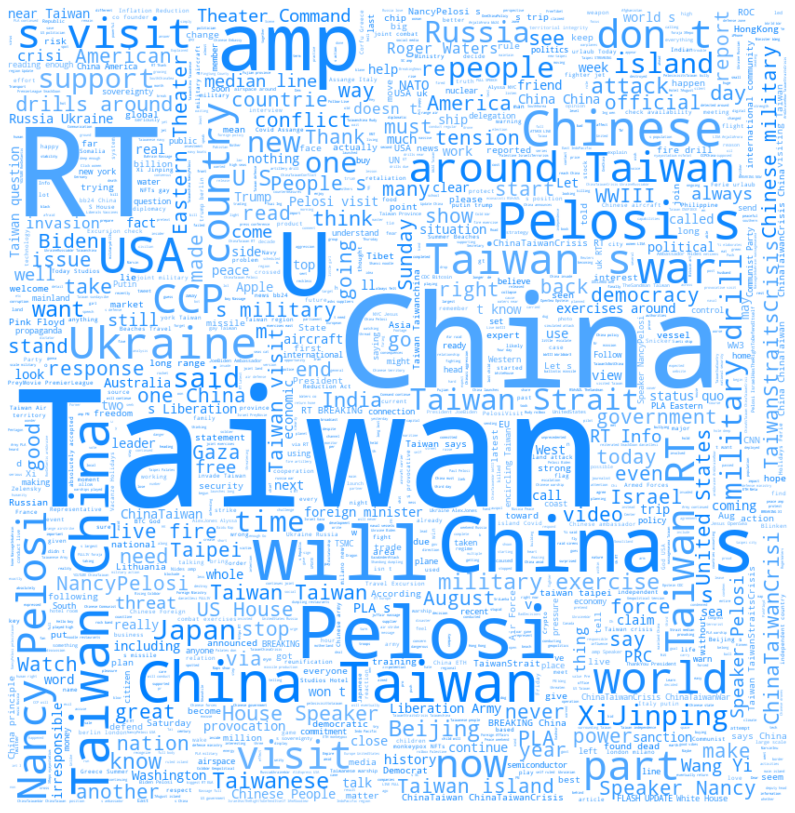

In [78]:
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [84]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [85]:
tweets_df['Tweets_Sentiments'] = tweets_df['original_text'].apply(remove_punctuations)

In [82]:
def preprocessTweets(tweet):
    
    # Remove punctuations
    unpunctuated_words = [char for char in tweet_tokens if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)

In [86]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,Tweets_Adjectives,Tweets_Sentiments
0,0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,-1.250000e-01,en,4,2,i_ameztoy,20497,2621,No Neutral,City,i_ameztoy,No place,RT ameztoy Extra random image I Lets focus in ...,RT iameztoy Extra random image I\n\nLets focus...
1,1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,0.100000,-1.000000e-01,en,691,201,ZIisq,65,272,No Neutral,"China, Taiwan",IndoPac_Info,No place,RT Info China s media explains the military re...,RT IndoPacInfo Chinas media explains the milit...
2,2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000,0.000000e+00,en,0,0,Fin21Free,85,392,No Neutral,XiJinping,ZelenskyyUa,Netherlands,China even cut off communication they don t an...,China even cut off communication they dont anw...
3,3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",0.350000,1.000000e-01,en,0,0,Fin21Free,85,392,No Neutral,XiJinping,No user mention,Netherlands,Putin to XiJinping I told you my friend Taiwan...,Putin to XiJinping I told you my friend Taiwa...
4,4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: Iâm sorry, I thought Ta...",0.556250,-6.940000e-18,en,1521,381,VizziniDolores,910,2608,No Neutral,No hashtags,ChinaUncensored,"Ayent, Schweiz",RT I m sorry I thought Taiwan was an independe...,RT ChinaUncensored Iâm sorry I thought Taiwa...


In [87]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [88]:
tweets_df['Subjectivity']=tweets_df['Tweets_Sentiments'].apply(getSubjectivity)
tweets_df['Polarity']=tweets_df['Tweets_Sentiments'].apply(getPolarity)
tweets_df['Sentiment']=tweets_df['Polarity'].apply(getSentimentTextBlob)

In [89]:
tweets_df['Sentiment'].value_counts()

Neutral     2937
Positive    2763
Negative    1739
Name: Sentiment, dtype: int64

In [90]:
bar_chart = tweets_df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [91]:
bar_chart 

,Sentiment,Total Tweets
0,Neutral,2937
1,Positive,2763
2,Negative,1739


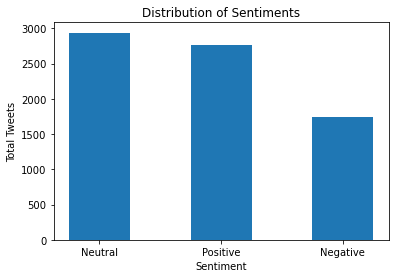

In [93]:
x = bar_chart['Sentiment']
y = bar_chart['Total Tweets']
plt.bar(x, y, width=0.5)
plt.xlabel("Sentiment")
plt.ylabel("Total Tweets")
plt.title("Distribution of Sentiments")
plt.show()

In [94]:
clean_tweet = tweets_df[['Tweets_Sentiments','polarity']]

In [95]:
clean_tweet.head(5)

,Tweets_Sentiments,polarity
0,RT iameztoy Extra random image I\n\nLets focus...,-1.250000e-01
1,RT IndoPacInfo Chinas media explains the milit...,-1.000000e-01
2,China even cut off communication they dont anw...,0.000000e+00
3,Putin to XiJinping I told you my friend Taiwa...,1.000000e-01
4,RT ChinaUncensored Iâm sorry I thought Taiwa...,-6.940000e-18


In [96]:
score = pd.Series([getSentimentTextBlob(row_value) for row_value in clean_tweet['polarity']])

In [97]:
clean_tweet = pd.concat([clean_tweet, score.rename("score")], axis=1)

In [98]:
clean_tweet.head(n=10)

,Tweets_Sentiments,polarity,score
0,RT iameztoy Extra random image I\n\nLets focus...,-1.250000e-01,Negative
1,RT IndoPacInfo Chinas media explains the milit...,-1.000000e-01,Negative
2,China even cut off communication they dont anw...,0.000000e+00,Neutral
3,Putin to XiJinping I told you my friend Taiwa...,1.000000e-01,Positive
4,RT ChinaUncensored Iâm sorry I thought Taiwa...,-6.940000e-18,Negative
5,RT benedictrogers We must not let this happen\...,2.000000e-01,Positive
6,RT TGTMOfficial What kind of country can conni...,1.583333e-01,Positive
7,RT ChinaInfo777 PinkFloyd singer Roger Waters ...,0.000000e+00,Neutral
8,RT AmbQinGang Chinas SCampFM Wang Yi elaborate...,0.000000e+00,Neutral
9,RT CGMeifangZhang Chinese ambassador to the US...,2.000000e-01,Positive


In [99]:
len(clean_tweet['polarity'])

7439

In [101]:
scoremap = pd.Series([1 if row_value == 'Positive' else 0 for row_value in clean_tweet['score']])

In [102]:
len(scoremap)

7439

In [103]:
clean_tweet['scoremap'] = scoremap
X = clean_tweet['Tweets_Sentiments']
y = clean_tweet['scoremap']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
print(X_train.size,',' , X_test.size)
print(X_test.size, ',',y_test.size)

5951 , 1488
1488 , 1488


In [107]:
clf = LinearSVC()

In [108]:
unigram_tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range = (1, 1))
bigram_tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range = (2, 2))
hybrid_tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range = (1, 2))

Unigram TF-IDF

In [109]:
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = unigram_tfidf_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()
clf.fit(X_train_counts, y_train)

LinearSVC()

In [110]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test_counts = unigram_tfidf_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
prediction = clf.predict(X_test_counts)

In [111]:
np.mean(prediction == y_test)

0.8608870967741935

Bigram TF-IDF

In [112]:
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = bigram_tfidf_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()
clf.fit(X_train_counts, y_train)

LinearSVC()

In [113]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test_counts = bigram_tfidf_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
prediction = clf.predict(X_test_counts)

In [114]:
np.mean(prediction == y_test)

0.728494623655914

Hybridgram TF-IDF

In [115]:
X_train_counts = hybrid_tfidf_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()
model = clf.fit(X_train_counts, y_train)

In [116]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test_counts = hybrid_tfidf_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
prediction = clf.predict(X_test_counts)

In [117]:
np.mean(prediction == y_test)

0.8723118279569892

##### Save the Model

In [118]:
pickle.dump(model, open('modeltoTDA.pkl', 'wb'))

In [120]:
pickled_model = pickle.load(open('modeltoTDA.pkl', 'rb'))